In [33]:
# Importing csv file
import pandas as pd

path = "..\dataset\SCDB_2021.csv"

raw_df = pd.read_csv(path, encoding = 'cp1252')
raw_df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement,partyWinning
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN,1.0
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN,1.0
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN,1.0
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN,1.0


In [34]:
print(raw_df.shape)

(122754, 62)


In [35]:
class_counts = raw_df.groupby('partyWinning').size()
print(class_counts)

partyWinning
0.0    46355
1.0    76165
2.0       81
dtype: int64


c:\Users\Ayesha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


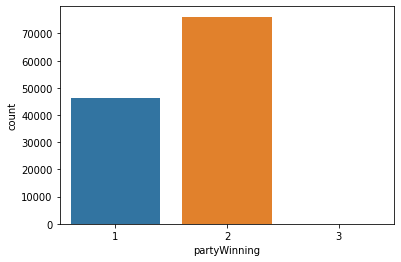

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt

distribution = sns.countplot(raw_df['partyWinning'])
distribution.set_xticklabels(['1', '2', '3'])

plt.show()

In [37]:
# deal with null values

raw_df.isnull().sum()

caseId                  0
docketId                0
caseIssuesId            0
voteId                  0
dateDecision            0
                    ...  
direction            6882
majority             4512
firstAgreement     106382
secondAgreement    120287
partyWinning          153
Length: 62, dtype: int64

In [38]:
# drop features where null values > 15000

df = raw_df.copy()

for col in df.columns:
    if df[col].isnull().sum() > 15000:
        df.drop(col, axis=1, inplace=True)

print(df.shape)

(122754, 48)


In [39]:
# drop rows where partyWinning = null

df.dropna(subset=['partyWinning'], inplace=True)

In [40]:
df = df.drop(['usCite', 'lexisCite', 'ledCite', 'docket', 'dateArgument', 'sctCite', 'docketId', 'caseId', 
'caseIssuesId', 'voteId', 'majOpinAssigner', 'caseSource', 'caseName', 'chief', 'justiceName', 'justice'], axis=1)

df[df.columns[df.isnull().any()]].isnull().sum()

petitioner                     18
respondent                     63
jurisdiction                   18
threeJudgeFdc                 198
caseOrigin                   4105
lcDisagreement                135
certReason                   1133
lcDispositionDirection       2127
declarationUncon                9
caseDisposition              1472
caseDispositionUnusual          9
precedentAlteration             9
voteUnclear                    18
issue                         458
issueArea                     458
decisionDirection             224
decisionDirectionDissent     1979
authorityDecision1            485
lawType                     14433
lawSupp                     14433
vote                         3439
opinion                      3448
direction                    6738
majority                     4368
dtype: int64

In [41]:
# drop rows where lawSupp = null
df.dropna(subset=['lawSupp'], inplace=True)

In [42]:
df['direction'] = df['direction'].fillna(3)
df['opinion'] = df['opinion'].fillna(1)

In [43]:
print(df.shape)
print(df.columns)

(108168, 32)
Index(['dateDecision', 'decisionType', 'term', 'naturalCourt', 'petitioner',
       'respondent', 'jurisdiction', 'threeJudgeFdc', 'caseOrigin',
       'lcDisagreement', 'certReason', 'lcDispositionDirection',
       'declarationUncon', 'caseDisposition', 'caseDispositionUnusual',
       'precedentAlteration', 'voteUnclear', 'issue', 'issueArea',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'lawSupp', 'splitVote', 'majVotes', 'minVotes', 'vote',
       'opinion', 'direction', 'majority', 'partyWinning'],
      dtype='object')


In [44]:
# Mode imputation for remaining null values

for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [45]:
# encode string (object) variables - prepare input data
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == object:
        df[col] = LabelEncoder().fit_transform(df[col])

In [46]:
array = df.values
X = array[:,0:31]
Y = array[:, 31]

In [47]:
# Class balancing

from imblearn.combine import SMOTEENN
from collections import Counter

counter = Counter(Y)
print('Before', counter)

smenn = SMOTEENN()
X_smenn, y_smenn = smenn.fit_resample(X, Y)

counter = Counter(y_smenn)
print('After', counter)

Before Counter({1.0: 66672, 0.0: 41424, 2.0: 72})
After Counter({2.0: 66672, 1.0: 66630, 0.0: 66626})


In [48]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std

# feature extraction
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
dc_fit = rfe.fit(X, Y)

#kfold = KFold(n_splits=10)
cv = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=cv)

selected_features = []

for x in range(len(dc_fit.ranking_)):
  if (dc_fit.ranking_[x] == 1) :
    selected_features.append(df.columns[x])

print("Selected Features: %s" % selected_features)
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

Selected Features: ['dateDecision', 'term', 'respondent', 'caseDisposition', 'issue']
Accuracy: 0.809 (0.216)


In [49]:
# feature extraction
model2 = DecisionTreeClassifier(random_state=1)
rfe2 = RFE(model2, n_features_to_select=5)
dc_fit2 = rfe2.fit(X_smenn, y_smenn)

cv = StratifiedKFold(n_splits=10)
results2 = cross_val_score(model2, X_smenn, y_smenn, cv=cv)

selected_features2 = []

for x in range(len(dc_fit2.ranking_)):
  if (dc_fit2.ranking_[x] == 1) :
    selected_features2.append(df.columns[x])

print("Selected Features: %s" % selected_features2)
print('Accuracy: %.3f (%.3f)' % (mean(results2), std(results2)))

Selected Features: ['dateDecision', 'term', 'caseOrigin', 'caseDisposition', 'decisionDirection']
Accuracy: 0.868 (0.111)
